# Assignment 3

Student Name: Xing Yang Goh

Student ID: 1001969

## Question 1: Loading and pre-processing the data

### Read the data

First, you will read in the data and create train features, train labels, test features and test labels. Do not apply any data transformations in this step and keep the '?' as is. 

In [1]:
import pandas as pd
import numpy as np
from scipy.sparse import csr_matrix

dev_count = pd.read_csv("dev_count.csv")
dev_glove = pd.read_csv("dev_glove.csv")
dev_tfidf = pd.read_csv("dev_tfidf.csv")

test_count = pd.read_csv("test_count.csv")
test_glove = pd.read_csv("test_glove.csv")
test_tfidf = pd.read_csv("test_tfidf.csv")

train_count = pd.read_csv("train_count.csv")
train_glove = pd.read_csv("train_glove.csv")
train_tfidf = pd.read_csv("train_tfidf.csv")

dev_label = dev_count["sentiment"]
dev_label = dev_label.values.tolist()
train_label = train_count["sentiment"]
train_label = train_label.values.tolist()

dev_count_tweet = dev_count["tweet"]
dev_count_tweet = dev_count_tweet.values.tolist()
test_count_tweet = test_count["tweet"]
test_count_tweet = test_count_tweet.values.tolist()
train_count_tweet = train_count["tweet"]
train_count_tweet = train_count_tweet.values.tolist()

dev_tfidf_tweet = dev_tfidf["tweet"]
dev_tfidf_tweet = dev_tfidf_tweet.values.tolist()
test_tfidf_tweet = test_tfidf["tweet"]
test_tfidf_tweet = test_tfidf_tweet.values.tolist()
train_tfidf_tweet = train_tfidf["tweet"]
train_tfidf_tweet = train_tfidf_tweet.values.tolist()

dev_glove_tweet = dev_glove["tweet"]
dev_glove_tweet = dev_glove_tweet.values.tolist()
test_glove_tweet = test_glove["tweet"]
test_glove_tweet = test_glove_tweet.values.tolist()
train_glove_tweet = train_glove["tweet"]
train_glove_tweet = train_glove_tweet.values.tolist()



def countVectorize(vector, newVector):
    for i in range(len(vector)):
        vector[i] = vector[i].strip('[')
        vector[i] = vector[i].strip(']')
        vector[i] = vector[i].split(', (')
    
        for j in range(len(vector[i])):
            vector[i][j] = vector[i][j].strip('(')
            vector[i][j] = vector[i][j].strip(')')
            temp = vector[i][j].split(',')
            newVector[i][int(temp[0])] = float(temp[1])
    return newVector

def gloveVectorise(vector):
    for i in range(len(vector)):
        vector[i] = vector[i].strip('[')
        vector[i] = vector[i].strip(']')
        vector[i] = vector[i].split(',')
    return vector

test_count_instance = np.zeros((len(test_count_tweet), 5000))
test_count_instance = countVectorize(test_count_tweet, test_count_instance)
A = csr_matrix(test_count_instance)
test_count_instance = A.todense().A

dev_count_instance = np.zeros((len(dev_count_tweet), 5000))
dev_count_instance = countVectorize(dev_count_tweet, dev_count_instance)
A = csr_matrix(dev_count_instance)
dev_count_instance = A.todense().A

train_count_instance = np.zeros((len(train_count_tweet), 5000))
train_count_instance = countVectorize(train_count_tweet, train_count_instance)
A = csr_matrix(train_count_instance)
train_count_instance = A.todense().A

test_tfidf_instance = np.zeros((len(test_tfidf_tweet), 5000))
test_tfidf_instance = countVectorize(test_tfidf_tweet, test_tfidf_instance)
A = csr_matrix(test_tfidf_instance)
test_tfidf_instance = A.todense().A

dev_tfidf_instance = np.zeros((len(dev_tfidf_tweet), 5000))
dev_tfidf_instance = countVectorize(dev_tfidf_tweet, dev_tfidf_instance)
A = csr_matrix(dev_tfidf_instance)
dev_tfidf_instance = A.todense().A

train_tfidf_instance = np.zeros((len(train_tfidf_tweet), 5000))
train_tfidf_instance = countVectorize(train_tfidf_tweet, train_tfidf_instance)
A = csr_matrix(train_tfidf_instance)
train_tfidf_instance = A.todense().A

test_glove_instance = np.array(gloveVectorise(test_glove_tweet))
test_glove_instance = test_glove_instance.astype(np.float64)
A = csr_matrix(test_glove_instance)
test_glove_instance = A.todense().A

dev_glove_instance =  np.array(gloveVectorise(dev_glove_tweet))
dev_glove_instance = dev_glove_instance.astype(np.float64)
A = csr_matrix(dev_glove_instance)
dev_glove_instance = A.todense().A

train_glove_instance =  np.array(gloveVectorise(train_glove_tweet))
train_glove_instance = train_glove_instance.astype(np.float64)
A = csr_matrix(train_glove_instance)
train_glove_instance = A.todense().A
 

## Zero R baseline

In [2]:
from sklearn.dummy import DummyClassifier
from collections import Counter
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score

dummy_clf = DummyClassifier(strategy="most_frequent")
dummy_clf.fit(train_count_instance, train_label)
DummyClassifier(strategy='most_frequent')
predictions = dummy_clf.predict(dev_count_instance)

baselineAccuracy = accuracy_score(predictions, dev_label)
baselineF1Macro = f1_score(predictions, dev_label, average='macro')
baselineF1Micro = f1_score(predictions, dev_label, average='micro')


print(f"Zero-R baseline classifier \t\tAccuracy: {round(baselineAccuracy, 4)}\tMacro F1: {round(baselineF1Macro, 4)}\tMicro F1: {round(baselineF1Micro, 4)}")
print(f"Training label class distribution\t {Counter(train_label)}")


Zero-R baseline classifier 		Accuracy: 0.4067	Macro F1: 0.1927	Micro F1: 0.4067
Training label class distribution	 Counter({'neg': 64872, 'pos': 62447, 'neu': 31934})


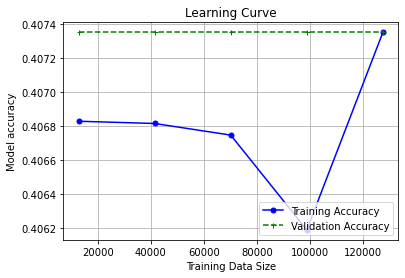

In [3]:
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt


train_sizes, train_scores, test_scores = learning_curve(estimator=DummyClassifier(strategy="most_frequent"), X=train_count_instance, y=train_label)
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.plot(train_sizes, train_mean, color='blue', marker='o', markersize=5, label='Training Accuracy')
plt.plot(train_sizes, test_mean, color='green', marker='+', markersize=5, linestyle='--', label='Validation Accuracy')
plt.title('Learning Curve')
plt.xlabel('Training Data Size')
plt.ylabel('Model accuracy')
plt.grid()
plt.legend(loc='lower right')
plt.show()

## Naive Bayes

In [7]:
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import CategoricalNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
##################################
## your code begins here
##################################

# using Categorical NB model and fitting train instances. Apply model on test features 
def nb_cat_features(train_features, train_labels, test_features):
    predictions = []      
    classifier = CategoricalNB()
    classifier.fit(train_features, train_labels)
    predictions = classifier.predict(test_features)
    return predictions

# using Gaussian NB model and fitting train instances. Apply model on test features 
def nb_num_features(train_features, train_labels, test_features):
    predictions = []      
    classifier = GaussianNB()
    classifier.fit(train_features, train_labels)
    predictions = classifier.predict(test_features)
    return predictions

def nb_text_features(train_features, train_labels, test_features):
    predictions = []      
    classifier = MultinomialNB()
    classifier.fit(train_features, train_labels)
    predictions = classifier.predict(test_features)
    return predictions

#categorical_predictions = nb_cat_features(train_tweet_instance, train_label, dev_tweet_instance)
#categoricalAccuracy = accuracy_score(categorical_predictions, dev_label)
#categoricalF1 = f1_score(multinomial_predictions, dev_label, average='macro')

#numerical_predictions = nb_num_features(train_tweet_instance, train_label, dev_tweet_instance)
#numericalAccuracy = accuracy_score(numerical_predictions, dev_label)
#numericalF1 = f1_score(multinomial_predictions, dev_label, average='macro')

multinomial_predictions = nb_text_features(train_count_instance, train_label, dev_count_instance)
multinomialAccuracy = accuracy_score(multinomial_predictions, dev_label)
multinomialF1 = f1_score(multinomial_predictions, dev_label, average='macro')

print(f"NB Multinomial for counts \t\tAccuracy: {round(multinomialAccuracy, 4)}\tMacro F1: {round(multinomialF1, 4)}")

multinomial_predictions = nb_text_features(train_tfidf_instance, train_label, dev_tfidf_instance)
multinomialAccuracy = accuracy_score(multinomial_predictions, dev_label)
multinomialF1 = f1_score(multinomial_predictions, dev_label, average='macro')

print(f"NB Multinomial for tfidf \t\tAccuracy: {round(multinomialAccuracy, 4)}\tMacro F1: {round(multinomialF1, 4)}")



#print(f"NB Numerical for counts \t\tAccuracy: {round(numericalAccuracy, 4)}\tMacro F1: {round(numericalF1, 4)}")
#print(f"NB Categorical for counts \t\tAccuracy: {round(categoricalAccuracy, 4)}\tMacro F1: {round(categoricalF1, 4)}")

############################
## your code ends here
############################

NB Multinomial for counts 		Accuracy: 0.7308	Macro F1: 0.7467
NB Multinomial for tfidf 		Accuracy: 0.7256	Macro F1: 0.743


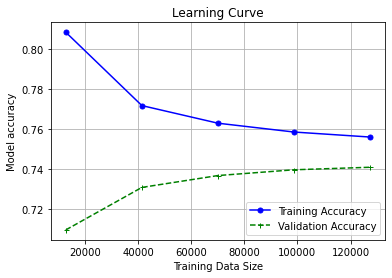

In [14]:
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt
from sklearn.naive_bayes import MultinomialNB


train_sizes, train_scores, test_scores = learning_curve(estimator=MultinomialNB(), X=train_count_instance, y=train_label)
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.plot(train_sizes, train_mean, color='blue', marker='o', markersize=5, label='Training Accuracy')
plt.plot(train_sizes, test_mean, color='green', marker='+', markersize=5, linestyle='--', label='Validation Accuracy')
plt.title('Learning Curve')
plt.xlabel('Training Data Size')
plt.ylabel('Model accuracy')
plt.grid()
plt.legend(loc='lower right')
plt.show()

## Logistic Regression

In [9]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score


lr_predictions = []
x_train_norm_full = []
x_test_norm_full = []
lr_coeffs = {}

############################
## your code begins here
############################


# fit standard scaler
scaler = StandardScaler()
scaler.fit(train_glove_instance)
train_glove_instance_scaled = scaler.transform(train_glove_instance)
dev_glove_instance_scaled = scaler.transform(dev_glove_instance)

# fit logistic regression model with training instances then apply on testing instances
classifier = LogisticRegression(max_iter=1000).fit(train_glove_instance_scaled, train_label)
lr_predictions = classifier.predict(dev_glove_instance_scaled)

lr_err = accuracy_score(lr_predictions, dev_label)
lr_f1 = f1_score(lr_predictions, dev_label, average='macro')

print(f"LR for glove \t\tAccuracy: {round(lr_err, 4)}\tMacro F1: {round(lr_f1, 4)}")


# fit standard scaler
scaler = StandardScaler()
scaler.fit(train_count_instance)
train_count_instance_scaled = scaler.transform(train_count_instance)
dev_count_instance_scaled = scaler.transform(dev_count_instance)

# fit logistic regression model with training instances then apply on testing instances
classifier = LogisticRegression(max_iter=1000).fit(train_count_instance_scaled, train_label)
lr_predictions = classifier.predict(dev_count_instance_scaled)

lr_err = accuracy_score(lr_predictions, dev_label)
lr_f1 = f1_score(lr_predictions, dev_label, average='macro')

print(f"LR for counts \t\tAccuracy: {round(lr_err, 4)}\tMacro F1: {round(lr_f1, 4)}")


# fit standard scaler
scaler = StandardScaler()
scaler.fit(train_tfidf_instance)
train_tfidf_instance_scaled = scaler.transform(train_tfidf_instance)
dev_tfidf_instance_scaled = scaler.transform(dev_tfidf_instance)

# fit logistic regression model with training instances then apply on testing instances 
classifier = LogisticRegression(max_iter=1000).fit(train_tfidf_instance_scaled, train_label)
lr_predictions = classifier.predict(dev_tfidf_instance_scaled)

lr_err = accuracy_score(lr_predictions, dev_label)
lr_f1 = f1_score(lr_predictions, dev_label, average='macro')

print(f"LR for tfidf \t\tAccuracy: {round(lr_err, 4)}\tMacro F1: {round(lr_f1, 4)}")


LR for glove 		Accuracy: 0.6777	Macro F1: 0.694
LR for counts 		Accuracy: 0.7365	Macro F1: 0.7517
LR for tfidf 		Accuracy: 0.7373	Macro F1: 0.7528


In [34]:
testScaled = scaler.transform(test_count_instance)
test_predictions =classifier.predict(testScaled)
ids = test_count["tweet_id"].values.tolist()
ids = np.array(ids)
dataset = pd.DataFrame({'tweet_id': ids, 'sentiment': test_predictions}, columns=['tweet_id', 'sentiment'])
dataset.to_csv('out.csv', index=False)

In [ ]:
print(f"LR for glove \t\tAccuracy: 0.6777 \tMacro F1: 0.694")
print(f"LR for counts \t\tAccuracy: 0.7365 \tMacro F1: 0.7517")
print(f"LR for tfidf \t\tAccuracy: 0.7373 \tMacro F1: 0.7528")

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt



pipeline = make_pipeline(StandardScaler(), LogisticRegression(max_iter=500))

train_sizes, train_scores, test_scores = learning_curve(estimator=pipeline, X=train_tfidf_instance, y=train_label, train_sizes=([0.03, 0.8, 0.15]))
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.plot(train_sizes, train_mean, color='blue', marker='o', markersize=5, label='Training Accuracy')
plt.plot(train_sizes, test_mean, color='green', marker='+', markersize=5, linestyle='--', label='Validation Accuracy')
plt.title('Learning Curve')
plt.xlabel('Training Data Size')
plt.ylabel('Model accuracy')
plt.grid()
plt.legend(loc='lower right')
plt.show()

In [ ]:
test_tfidf_instance_scaled = scaler.transform(test_tfidf_instance)
lr_predictions = classifier.predict(test_tfidf_instance_scaled)

## Multilayer Perceptron

In [38]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score

clf = MLPClassifier(random_state=1, max_iter=20).fit(train_glove_instance, train_label)
MLP_predictions = clf.predict(dev_glove_instance)

mlp_err = accuracy_score(MLP_predictions, dev_label)
mlp_f1 = f1_score(MLP_predictions, dev_label, average='macro')

print(f"MLP for glove \t\tAccuracy: {round(mlp_err, 4)}\tMacro F1: {round(mlp_f1, 4)}")

clf = MLPClassifier(random_state=1, max_iter=20).fit(train_tfidf_instance, train_label)
MLP_predictions = clf.predict(dev_tfidf_instance)

mlp_err = accuracy_score(MLP_predictions, dev_label)
mlp_f1 = f1_score(MLP_predictions, dev_label, average='macro')

print(f"MLP for tfidf \t\tAccuracy: {round(mlp_err, 4)}\tMacro F1: {round(mlp_f1, 4)}")

clf = MLPClassifier(random_state=1, max_iter=20).fit(train_count_instance, train_label)
MLP_predictions = clf.predict(dev_count_instance)

mlp_err = accuracy_score(MLP_predictions, dev_label)
mlp_f1 = f1_score(MLP_predictions, dev_label, average='macro')

print(f"MLP for counts \t\tAccuracy: {round(mlp_err, 4)}\tMacro F1: {round(mlp_f1, 4)}")

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(


MLP for glove 		Accuracy: 0.7066	Macro F1: 0.7277


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(


MLP for tfidf 		Accuracy: 0.7136	Macro F1: 0.7316


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(


MLP for counts 		Accuracy: 0.7094	Macro F1: 0.7275


In [7]:
print(f"MLP for glove \t\tAccuracy: 0.7066 \tMicro F1: 0.7066")

print(f"MLP for tfidf \t\tAccuracy: 0.7136 \tMacro F1: 0.7136")

print(f"MLP for counts \t\tAccuracy: 0.7094 \tMacro F1: 0.7094")

MLP for glove 		Accuracy: 0.7066 	Micro F1: 0.7066
MLP for tfidf 		Accuracy: 0.7136 	Macro F1: 0.7136
MLP for counts 		Accuracy: 0.7094 	Macro F1: 0.7094


In [6]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score


clf = MLPClassifier(random_state=1, alpha=0.7, max_iter=20).fit(train_tfidf_instance, train_label)
MLP_predictions = clf.predict(dev_tfidf_instance)

mlp_err = accuracy_score(MLP_predictions, dev_label)
mlp_f1 = f1_score(MLP_predictions, dev_label, average='macro')

print(f"MLP for tfidf \t\tAccuracy: {round(mlp_err, 4)}\tMacro F1: {round(mlp_f1, 4)}")


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(


MLP for tfidf 		Accuracy: 0.7175	Macro F1: 0.7329


In [3]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score


clf = MLPClassifier(random_state=1, alpha=0.5, max_iter=20).fit(train_tfidf_instance, train_label)
MLP_predictions = clf.predict(dev_tfidf_instance)

mlp_err = accuracy_score(MLP_predictions, dev_label)
mlp_f1 = f1_score(MLP_predictions, dev_label, average='macro')

print(f"MLP for tfidf \t\tAccuracy: {round(mlp_err, 4)}\tMacro F1: {round(mlp_f1, 4)}")


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(


MLP for tfidf 		Accuracy: 0.7241	Macro F1: 0.7394


In [4]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score


clf = MLPClassifier(random_state=1, alpha=0.3, max_iter=20).fit(train_tfidf_instance, train_label)
MLP_predictions = clf.predict(dev_tfidf_instance)

mlp_err = accuracy_score(MLP_predictions, dev_label)
mlp_f1 = f1_score(MLP_predictions, dev_label, average='macro')

print(f"MLP for tfidf \t\tAccuracy: {round(mlp_err, 4)}\tMacro F1: {round(mlp_f1, 4)}")


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(


MLP for tfidf 		Accuracy: 0.7309	Macro F1: 0.7464


In [5]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score


clf = MLPClassifier(random_state=1, alpha=0.2, max_iter=20).fit(train_tfidf_instance, train_label)
MLP_predictions = clf.predict(dev_tfidf_instance)

mlp_err = accuracy_score(MLP_predictions, dev_label)
mlp_f1 = f1_score(MLP_predictions, dev_label, average='macro')

print(f"MLP for tfidf \t\tAccuracy: {round(mlp_err, 4)}\tMacro F1: {round(mlp_f1, 4)}")


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(


MLP for tfidf 		Accuracy: 0.7351	Macro F1: 0.7507


In [7]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score


clf = MLPClassifier(random_state=1, alpha=0.1, max_iter=20).fit(train_tfidf_instance, train_label)
MLP_predictions = clf.predict(dev_tfidf_instance)

mlp_err = accuracy_score(MLP_predictions, dev_label)
mlp_f1 = f1_score(MLP_predictions, dev_label, average='macro')

print(f"MLP for tfidf \t\tAccuracy: {round(mlp_err, 4)}\tMacro F1: {round(mlp_f1, 4)}")


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(


MLP for tfidf 		Accuracy: 0.7382	Macro F1: 0.754


In [18]:
MLP_predictions = clf.predict(train_tfidf_instance)

mlp_err = accuracy_score(MLP_predictions, train_label)
print(f"MLP for tfidf \t\tAccuracy: {round(mlp_err, 4)}\tMacro F1: {round(mlp_f1, 4)}")


MLP for tfidf 		Accuracy: 0.7945	Macro F1: 0.7597


In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score


clf = MLPClassifier(random_state=1, alpha=0.08, max_iter=40).fit(train_tfidf_instance, train_label)
MLP_predictions = clf.predict(dev_tfidf_instance)

mlp_err = accuracy_score(MLP_predictions, dev_label)
mlp_f1 = f1_score(MLP_predictions, dev_label, average='macro')

print(f"MLP for tfidf \t\tAccuracy: {round(mlp_err, 4)}\tMacro F1: {round(mlp_f1, 4)}")


In [19]:
test_predictions =clf.predict(test_count_instance)
ids = test_count["tweet_id"].values.tolist()
ids = np.array(ids)
dataset = pd.DataFrame({'tweet_id': ids, 'sentiment': test_predictions}, columns=['tweet_id', 'sentiment'])
dataset.to_csv('MLP.csv', index=False)

In [8]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score


clf = MLPClassifier(random_state=1, alpha=0.05, max_iter=20).fit(train_tfidf_instance, train_label)
MLP_predictions = clf.predict(dev_tfidf_instance)

mlp_err = accuracy_score(MLP_predictions, dev_label)
mlp_f1 = f1_score(MLP_predictions, dev_label, average='macro')

print(f"MLP for tfidf \t\tAccuracy: {round(mlp_err, 4)}\tMacro F1: {round(mlp_f1, 4)}")


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(


MLP for tfidf 		Accuracy: 0.7377	Macro F1: 0.754


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\neural_network\_multilaye

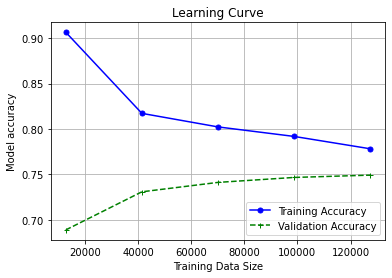

In [13]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt


clf = MLPClassifier(random_state=1, alpha=0.08).fit(train_tfidf_instance, train_label)

train_sizes, train_scores, test_scores = learning_curve(estimator=clf, X=train_tfidf_instance, y=train_label)
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.plot(train_sizes, train_mean, color='blue', marker='o', markersize=5, label='Training Accuracy')
plt.plot(train_sizes, test_mean, color='green', marker='+', markersize=5, linestyle='--', label='Validation Accuracy')
plt.title('Learning Curve')
plt.xlabel('Training Data Size')
plt.ylabel('Model accuracy')
plt.grid()
plt.legend(loc='lower right')
plt.show()

In [4]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score


clf = MLPClassifier(random_state=1, alpha=0.1, max_iter=40).fit(train_glove_instance, train_label)
MLP_predictions = clf.predict(dev_glove_instance)

mlp_err = accuracy_score(MLP_predictions, dev_label)
mlp_f1 = f1_score(MLP_predictions, dev_label, average='macro')

print(f"MLP for tfidf \t\tAccuracy: {round(mlp_err, 4)}\tMacro F1: {round(mlp_f1, 4)}")

MLP for tfidf 		Accuracy: 0.7114	Macro F1: 0.7319


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (40) reached and the optimization hasn't converged yet.
  warnings.warn(


## Decision Trees

In [37]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
clf = DecisionTreeClassifier(criterion='entropy').fit(train_glove_instance, train_label)
DT_predictions = clf.predict(dev_glove_instance)

mlp_err = accuracy_score(DT_predictions, dev_label)
mlp_f1 = f1_score(DT_predictions, dev_label, average='macro')

print(f"DT for glove \t\tAccuracy: {round(mlp_err, 4)}\tMacro F1: {round(mlp_f1, 4)}")

clf = DecisionTreeClassifier(criterion='entropy').fit(train_count_instance, train_label)
DT_predictions = clf.predict(dev_count_instance)

mlp_err = accuracy_score(DT_predictions, dev_label)
mlp_f1 = f1_score(DT_predictions, dev_label, average='macro')

print(f"DT for counts \t\tAccuracy: {round(mlp_err, 4)}\tMacro F1: {round(mlp_f1, 4)}")

clf = DecisionTreeClassifier(criterion='entropy').fit(train_tfidf_instance, train_label)
DT_predictions = clf.predict(dev_tfidf_instance)

mlp_err = accuracy_score(DT_predictions, dev_label)
mlp_f1 = f1_score(DT_predictions, dev_label, average='macro')

print(f"DT for tfidf \t\tAccuracy: {round(mlp_err, 4)}\tMacro F1: {round(mlp_f1, 4)}")


DT for glove 		Accuracy: 0.5465	Macro F1: 0.5647
DT for counts 		Accuracy: 0.639	Macro F1: 0.655
DT for tfidf 		Accuracy: 0.6356	Macro F1: 0.6524


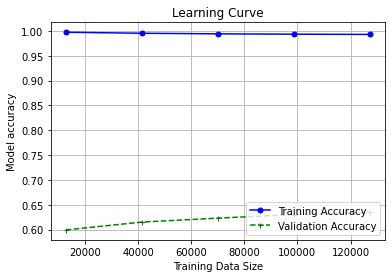

In [35]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt


train_sizes, train_scores, test_scores = learning_curve(estimator=DecisionTreeClassifier(), X=train_count_instance, y=train_label)
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.plot(train_sizes, train_mean, color='blue', marker='o', markersize=5, label='Training Accuracy')
plt.plot(train_sizes, test_mean, color='green', marker='+', markersize=5, linestyle='--', label='Validation Accuracy')
plt.title('Learning Curve')
plt.xlabel('Training Data Size')
plt.ylabel('Model accuracy')
plt.grid()
plt.legend(loc='lower right')
plt.show()

In [28]:
clf = DecisionTreeClassifier(criterion='entropy', max_depth=25).fit(train_count_instance, train_label)
DT_predictions = clf.predict(dev_count_instance)

mlp_err = accuracy_score(DT_predictions, dev_label)
mlp_f1 = f1_score(MLP_predictions, dev_label, average='macro')

print(f"DT for counts \t\tAccuracy: {round(mlp_err, 4)}\tMicro F1: {round(mlp_f1, 4)}")

DT for counts 		Accuracy: 0.5023	Micro F1: 0.7094


In [29]:
clf = DecisionTreeClassifier(criterion='entropy', max_depth=30).fit(train_count_instance, train_label)
DT_predictions = clf.predict(dev_count_instance)

mlp_err = accuracy_score(DT_predictions, dev_label)
mlp_f1 = f1_score(MLP_predictions, dev_label, average='macro')

print(f"DT for counts \t\tAccuracy: {round(mlp_err, 4)}\tMicro F1: {round(mlp_f1, 4)}")

DT for counts 		Accuracy: 0.5148	Micro F1: 0.7094


In [30]:
clf = DecisionTreeClassifier(criterion='entropy', max_depth=40).fit(train_count_instance, train_label)
DT_predictions = clf.predict(dev_count_instance)

mlp_err = accuracy_score(DT_predictions, dev_label)
mlp_f1 = f1_score(MLP_predictions, dev_label, average='micro')

print(f"DT for counts \t\tAccuracy: {round(mlp_err, 4)}\tMicro F1: {round(mlp_f1, 4)}")

DT for counts 		Accuracy: 0.5301	Micro F1: 0.7094


In [31]:
clf = DecisionTreeClassifier(criterion='entropy', max_depth=50).fit(train_count_instance, train_label)
DT_predictions = clf.predict(dev_count_instance)

mlp_err = accuracy_score(DT_predictions, dev_label)
mlp_f1 = f1_score(MLP_predictions, dev_label, average='micro')

print(f"DT for counts \t\tAccuracy: {round(mlp_err, 4)}\tMicro F1: {round(mlp_f1, 4)}")

DT for counts 		Accuracy: 0.5474	Micro F1: 0.7094


In [32]:
clf = DecisionTreeClassifier(criterion='entropy', max_depth=70).fit(train_count_instance, train_label)
DT_predictions = clf.predict(dev_count_instance)

mlp_err = accuracy_score(DT_predictions, dev_label)
mlp_f1 = f1_score(MLP_predictions, dev_label, average='micro')

print(f"DT for counts \t\tAccuracy: {round(mlp_err, 4)}\tMicro F1: {round(mlp_f1, 4)}")

DT for counts 		Accuracy: 0.5785	Micro F1: 0.7094


In [33]:
clf = DecisionTreeClassifier(criterion='entropy', max_depth=90).fit(train_count_instance, train_label)
DT_predictions = clf.predict(dev_count_instance)

mlp_err = accuracy_score(DT_predictions, dev_label)
mlp_f1 = f1_score(MLP_predictions, dev_label, average='micro')

print(f"DT for counts \t\tAccuracy: {round(mlp_err, 4)}\tMicro F1: {round(mlp_f1, 4)}")

DT for counts 		Accuracy: 0.594	Micro F1: 0.7094


In [34]:
clf = DecisionTreeClassifier(criterion='entropy', max_depth=120).fit(train_count_instance, train_label)
DT_predictions = clf.predict(dev_count_instance)

mlp_err = accuracy_score(DT_predictions, dev_label)
mlp_f1 = f1_score(MLP_predictions, dev_label, average='micro')

print(f"DT for counts \t\tAccuracy: {round(mlp_err, 4)}\tMicro F1: {round(mlp_f1, 4)}")

DT for counts 		Accuracy: 0.6099	Micro F1: 0.7094


In [35]:
clf = DecisionTreeClassifier(criterion='entropy', max_depth=140).fit(train_count_instance, train_label)
DT_predictions = clf.predict(dev_count_instance)

mlp_err = accuracy_score(DT_predictions, dev_label)
mlp_f1 = f1_score(MLP_predictions, dev_label, average='micro')

print(f"DT for counts \t\tAccuracy: {round(mlp_err, 4)}\tMicro F1: {round(mlp_f1, 4)}")

DT for counts 		Accuracy: 0.6158	Micro F1: 0.7094


In [36]:
clf = DecisionTreeClassifier(criterion='entropy', max_depth=160).fit(train_count_instance, train_label)
DT_predictions = clf.predict(dev_count_instance)

mlp_err = accuracy_score(DT_predictions, dev_label)
mlp_f1 = f1_score(MLP_predictions, dev_label, average='micro')

print(f"DT for counts \t\tAccuracy: {round(mlp_err, 4)}\tMicro F1: {round(mlp_f1, 4)}")

DT for counts 		Accuracy: 0.6205	Micro F1: 0.7094


In [37]:
clf = DecisionTreeClassifier(criterion='entropy', max_depth=200).fit(train_count_instance, train_label)
DT_predictions = clf.predict(dev_count_instance)

mlp_err = accuracy_score(DT_predictions, dev_label)
mlp_f1 = f1_score(MLP_predictions, dev_label, average='micro')

print(f"DT for counts \t\tAccuracy: {round(mlp_err, 4)}\tMicro F1: {round(mlp_f1, 4)}")

DT for counts 		Accuracy: 0.6241	Micro F1: 0.7094


In [38]:
clf = DecisionTreeClassifier(criterion='entropy', max_depth=250).fit(train_count_instance, train_label)
DT_predictions = clf.predict(dev_count_instance)

mlp_err = accuracy_score(DT_predictions, dev_label)
mlp_f1 = f1_score(MLP_predictions, dev_label, average='micro')

print(f"DT for counts \t\tAccuracy: {round(mlp_err, 4)}\tMicro F1: {round(mlp_f1, 4)}")

DT for counts 		Accuracy: 0.6266	Micro F1: 0.7094


In [39]:
clf = DecisionTreeClassifier(criterion='entropy', max_depth=300).fit(train_count_instance, train_label)
DT_predictions = clf.predict(dev_count_instance)

mlp_err = accuracy_score(DT_predictions, dev_label)
mlp_f1 = f1_score(MLP_predictions, dev_label, average='micro')

print(f"DT for counts \t\tAccuracy: {round(mlp_err, 4)}\tMicro F1: {round(mlp_f1, 4)}")

DT for counts 		Accuracy: 0.6295	Micro F1: 0.7094


In [40]:
clf = DecisionTreeClassifier(criterion='entropy', max_depth=330).fit(train_count_instance, train_label)
DT_predictions = clf.predict(dev_count_instance)

mlp_err = accuracy_score(DT_predictions, dev_label)
mlp_f1 = f1_score(MLP_predictions, dev_label, average='micro')

print(f"DT for counts \t\tAccuracy: {round(mlp_err, 4)}\tMicro F1: {round(mlp_f1, 4)}")

DT for counts 		Accuracy: 0.6327	Micro F1: 0.7094


## Random Forest

In [8]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
clf = RandomForestClassifier(criterion='entropy').fit(train_glove_instance, train_label)
RF_predictions = clf.predict(dev_glove_instance)

mlp_err = accuracy_score(RF_predictions, dev_label)
mlp_f1 = f1_score(RF_predictions, dev_label, average='macro')

print(f"RF for glove \t\tAccuracy: {round(mlp_err, 4)}\tMacro F1: {round(mlp_f1, 4)}")

clf = RandomForestClassifier(criterion='entropy').fit(train_count_instance, train_label)
RF_predictions = clf.predict(dev_count_instance)

mlp_err = accuracy_score(RF_predictions, dev_label)
mlp_f1 = f1_score(RF_predictions, dev_label, average='macro')

print(f"RF for counts \t\tAccuracy: {round(mlp_err, 4)}\tMacro F1: {round(mlp_f1, 4)}")

clf = RandomForestClassifier(criterion='entropy').fit(train_tfidf_instance, train_label)
RF_predictions = clf.predict(dev_tfidf_instance)

mlp_err = accuracy_score(RF_predictions, dev_label)
mlp_f1 = f1_score(RF_predictions, dev_label, average='macro')

print(f"RF for tfidf \t\tAccuracy: {round(mlp_err, 4)}\tMacro F1: {round(mlp_f1, 4)}")

RF for glove 		Accuracy: 0.6629	Macro F1: 0.6837
RF for counts 		Accuracy: 0.6901	Macro F1: 0.7057
RF for tfidf 		Accuracy: 0.7022	Macro F1: 0.717


In [ ]:
test_predictions =classifier.predict(testScaled)
ids = test_count["tweet_id"].values.tolist()
ids = np.array(ids)
dataset = pd.DataFrame({'tweet_id': ids, 'sentiment': test_predictions}, columns=['tweet_id', 'sentiment'])
dataset.to_csv('out.csv', index=False)